# Proyecto final - Entrega 1 
MINE-4101: Applied Data Science  
Universidad de los Andes  
Estudiantes: Alejandra Guerrero, Luis Enrique Garcia, Diego Alejandro Peña

In [1]:
# Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import re
from datetime import date

%matplotlib inline

### Lectura de los datos

In [2]:
# Carga en memoria del archivo csv
ruta_datos='./datos/HomeData.csv'
df = pd.read_csv(ruta_datos, encoding='utf8')

C:\Users\aguer\AppData\Local\Temp\ipykernel_17056\4010228760.py:3: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_datos, encoding='utf8')


In [3]:
# Visualización de los datos cargados
df

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503906,1452128306,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503907,1452128307,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503908,1452128308,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503909,1452128309,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51


In [4]:
# Listado de columnas
df.dtypes

time                    object
use [kW]               float64
gen [kW]               float64
House overall [kW]     float64
Dishwasher [kW]        float64
Furnace 1 [kW]         float64
Furnace 2 [kW]         float64
Home office [kW]       float64
Fridge [kW]            float64
Wine cellar [kW]       float64
Garage door [kW]       float64
Kitchen 12 [kW]        float64
Kitchen 14 [kW]        float64
Kitchen 38 [kW]        float64
Barn [kW]              float64
Well [kW]              float64
Microwave [kW]         float64
Living room [kW]       float64
Solar [kW]             float64
temperature            float64
icon                    object
humidity               float64
visibility             float64
summary                 object
apparentTemperature    float64
pressure               float64
windSpeed              float64
cloudCover              object
windBearing            float64
precipIntensity        float64
dewPoint               float64
precipProbability      float64
dtype: o

In [5]:
# Tamaño del conjunto de datos
df.shape

(503911, 32)

### Transformaciones iniciales

Se identificará el total de valores nulos por cada columna y se procederán a eliminar aquellas filas que no aporten al análisis.

In [6]:
# Conteo de filas que poseen valores nulos por cada columna
df.isna().sum()

time                   0
use [kW]               1
gen [kW]               1
House overall [kW]     1
Dishwasher [kW]        1
Furnace 1 [kW]         1
Furnace 2 [kW]         1
Home office [kW]       1
Fridge [kW]            1
Wine cellar [kW]       1
Garage door [kW]       1
Kitchen 12 [kW]        1
Kitchen 14 [kW]        1
Kitchen 38 [kW]        1
Barn [kW]              1
Well [kW]              1
Microwave [kW]         1
Living room [kW]       1
Solar [kW]             1
temperature            1
icon                   1
humidity               1
visibility             1
summary                1
apparentTemperature    1
pressure               1
windSpeed              1
cloudCover             1
windBearing            1
precipIntensity        1
dewPoint               1
precipProbability      1
dtype: int64

In [7]:
# Eliminación de las filas que poseen el campo 'uso' nulo
df = df[df['use [kW]'].notna()]

Se cambiará el formato de la variable tiempo, ya que se encuentra en un formato que dificulta su interpretación, análisis y tratamiento.

In [8]:
df['time'] = pd.DatetimeIndex(pd.date_range('2016-01-01 05:00', periods=len(df),  freq='min'))
df.head()

C:\Users\aguer\AppData\Local\Temp\ipykernel_17056\857513045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = pd.DatetimeIndex(pd.date_range('2016-01-01 05:00', periods=len(df),  freq='min'))


,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,2016-01-01 05:01:00,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,2016-01-01 05:02:00,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,2016-01-01 05:03:00,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,2016-01-01 05:04:00,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


Se agregarán campos asociadas a la variable tiempo, a partir de los cuales se podría evaluar su relación con el consumo de energía

In [9]:
df['year'] = df['time'].apply(lambda x : x.year)
df['month'] = df['time'].apply(lambda x : x.month)
df['day'] = df['time'].apply(lambda x : x.day)
df['day of week'] = df['time'].apply(lambda x : x.day_name())
df['nday of week'] = df['time'].apply(lambda x : x.weekday()+1)
df['hour'] = df['time'].apply(lambda x : x.hour)
df['minute'] = df['time'].apply(lambda x : x.minute)
df.head()

C:\Users\aguer\AppData\Local\Temp\ipykernel_17056\3125948698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['time'].apply(lambda x : x.year)
C:\Users\aguer\AppData\Local\Temp\ipykernel_17056\3125948698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['time'].apply(lambda x : x.month)
C:\Users\aguer\AppData\Local\Temp\ipykernel_17056\3125948698.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,precipIntensity,dewPoint,precipProbability,year,month,day,day of week,nday of week,hour,minute
0,2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,0.0,24.4,0.0,2016,1,1,Friday,5,5,0
1,2016-01-01 05:01:00,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,0.0,24.4,0.0,2016,1,1,Friday,5,5,1
2,2016-01-01 05:02:00,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,0.0,24.4,0.0,2016,1,1,Friday,5,5,2
3,2016-01-01 05:03:00,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,0.0,24.4,0.0,2016,1,1,Friday,5,5,3
4,2016-01-01 05:04:00,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,0.0,24.4,0.0,2016,1,1,Friday,5,5,4


Se unirán aquellas columnas que representen el mismo concepto de consumo energético

In [10]:
# Revisión del consumo de energía para las categorías Furnace y Kitchen
df[['Furnace 1 [kW]', 'Furnace 2 [kW]', 'Kitchen 12 [kW]', 'Kitchen 14 [kW]', 'Kitchen 38 [kW]']].sum()

Furnace 1 [kW]     49993.062333
Furnace 2 [kW]     68924.395621
Kitchen 12 [kW]     1388.448483
Kitchen 14 [kW]     3539.012726
Kitchen 38 [kW]        4.725373
dtype: float64

In [11]:
# Unión de campos
df['Furnace [kW]'] = df[['Furnace 1 [kW]', 'Furnace 2 [kW]']].sum(axis=1)
df['Kitchen [kW]'] = df[['Kitchen 12 [kW]', 'Kitchen 14 [kW]', 'Kitchen 38 [kW]']].sum(axis=1)

C:\Users\aguer\AppData\Local\Temp\ipykernel_17056\3921529903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Furnace [kW]'] = df[['Furnace 1 [kW]', 'Furnace 2 [kW]']].sum(axis=1)
C:\Users\aguer\AppData\Local\Temp\ipykernel_17056\3921529903.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Kitchen [kW]'] = df[['Kitchen 12 [kW]', 'Kitchen 14 [kW]', 'Kitchen 38 [kW]']].sum(axis=1)


La columna CloudCover debería ser de tipo float, pero cuenta con algunos valores nominales, los cuales serán sustituidos por su valor más próximo considerando que los datos están presentes con una frecuencia de un minuto.

In [12]:
# Total de filas con valor erróneo
df.loc[df['cloudCover']=='cloudCover'].shape

(58, 41)

In [13]:
# Sustitución del valor cloudCover
df['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True)
df['cloudCover'] = df['cloudCover'].astype('float')
df['cloudCover'].unique()

C:\Users\aguer\AppData\Local\Temp\ipykernel_17056\1698346623.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cloudCover'] = df['cloudCover'].astype('float')


array([0.75, 0.  , 1.  , 0.31, 0.44, 0.13, 0.19, 0.25, 0.16, 0.21, 0.15,
       0.14, 0.27, 0.28, 0.17, 0.05, 0.1 , 0.26, 0.29, 0.11, 0.09, 0.12,
       0.06, 0.02, 0.08, 0.04, 0.35, 0.22, 0.23, 0.54, 0.39, 0.03, 0.07,
       0.76, 0.62, 0.18, 0.79, 0.48, 0.24, 0.57, 0.41, 0.78, 0.2 , 0.77,
       0.46, 0.55, 0.01, 0.51, 0.47, 0.5 , 0.4 , 0.3 , 0.43, 0.33, 0.6 ,
       0.68, 0.66, 0.45, 0.34, 0.52, 0.67, 0.49, 0.37, 0.36, 0.61, 0.38,
       0.42, 0.53, 0.63, 0.32, 0.56, 0.58, 0.72, 0.73, 0.71, 0.64, 0.59])

### Revisión de la variable tiempo

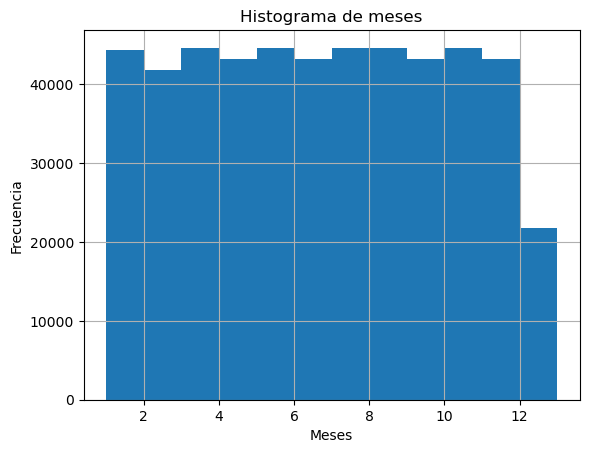

In [14]:
# Histograma para la variable Mes
intervalos = range(min(df['month']), max(df['month']) + 2)
plt.hist(x=df['month'], bins=intervalos)
plt.title('Histograma de meses')
plt.xlabel('Meses')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

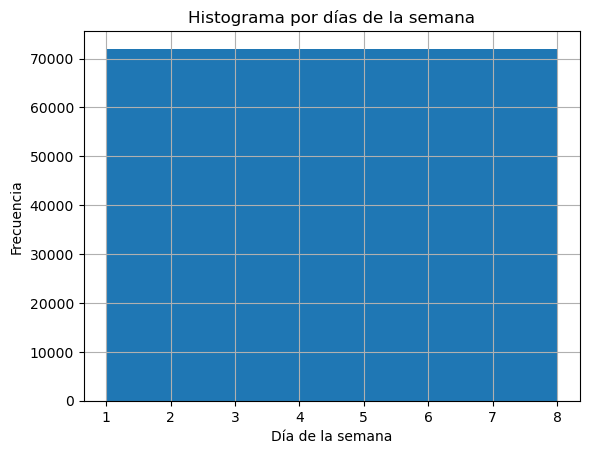

In [15]:
# Histograma para la variable día de la semana
intervalos = range(min(df['nday of week']), max(df['nday of week']) + 2)
plt.hist(x=df['nday of week'], bins=intervalos)
plt.title('Histograma por días de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

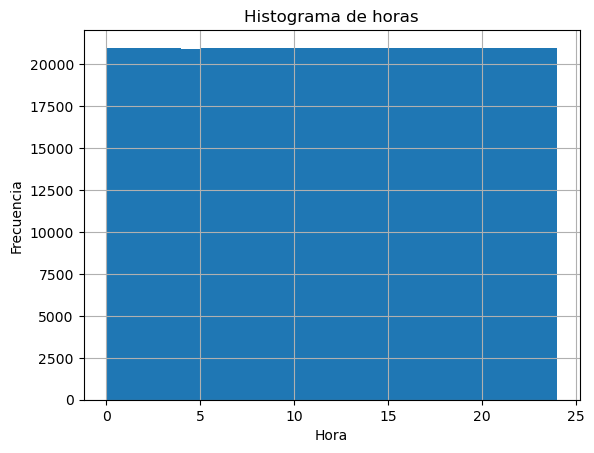

In [16]:
# Histograma para la variable Hora
intervalos = range(min(df['hour']), max(df['hour']) + 2)
plt.hist(x=df['hour'], bins=intervalos)
plt.title('Histograma de horas')
plt.xlabel('Hora')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

A partir de las gráficas anteriores se puede concluir que el conjunto de datos contiene una muestra significativa para cada uno de los meses del año, excepto para diciembre, por lo cual en dicho mes se podría presentar un sesgo. A nivel de día de la semana y franja horaria se identifica que no existen huecos de información, por lo cual son variables (junto con el mes) que se pueden considerar en el análisis.

### Revisión de la variable consumo

<AxesSubplot:xlabel='month'>

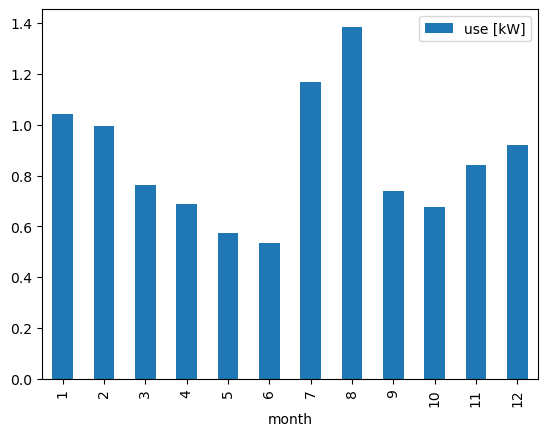

In [17]:
# Promedio del consumo de energía por mes del año
consumo_mes = df.groupby("month").agg({"use [kW]":"mean"}).reset_index()
consumo_mes.plot('month', kind = 'bar')

<AxesSubplot:xlabel='day'>

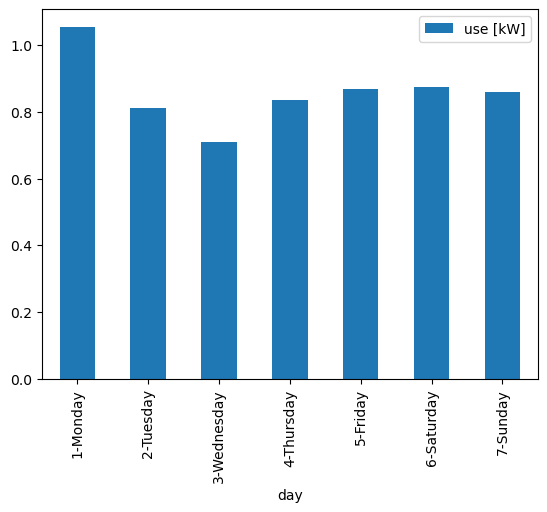

In [18]:
# Promedio del consumo de energía por día de la semana
consumo_dia = df.groupby(["nday of week", "day of week"]).agg({"use [kW]":"mean"}).reset_index()
consumo_dia['day'] = consumo_dia['nday of week'].apply(str) + '-' + consumo_dia['day of week']
consumo_dia.plot('day', 'use [kW]', kind = 'bar')

<AxesSubplot:xlabel='hour'>

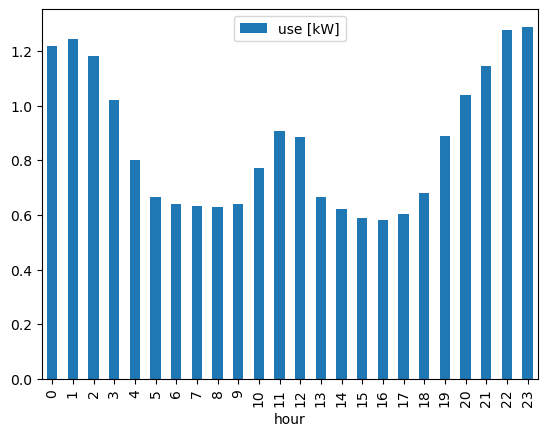

In [19]:
# Promedio del consumo de energía por hora de la semana
consumo_hora = df.groupby("hour").agg({"use [kW]":"mean"}).reset_index()
consumo_hora.plot('hour', kind = 'bar')

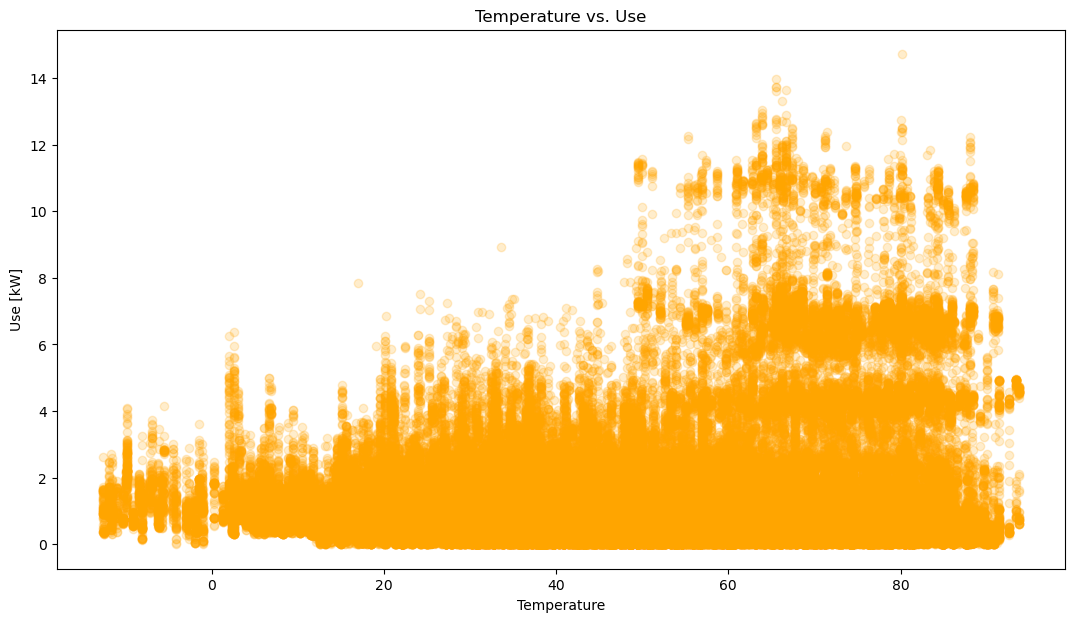

In [20]:
# Temperatura comparado contra el consumo de energía
plt.figure(figsize = (13, 7))
plt.scatter(df['temperature'], df['use [kW]'], alpha = 0.2, color = 'orange')
plt.title('Temperature vs. Use')
plt.xlabel('Temperature')
plt.ylabel('Use [kW]')
plt.show()

El promedio del consumo de energía es mayor en los meses de julio y agosto, lo cual podría relacionarse con que suelen ser los meses con mayores temperaturas. A nivel de día de la semana se identifica un incremento en el consumo de energía para el día lunes y una posterior caída en los días martes y miércoles. Finalmente, se evidencia un aumento en el consumo de energía en horas de la noche u oscuridad, que corresponde con el momento del día en el cual las personas pasan más tiempo en sus hogares y hacen uso de bombillas, electrodomésticos para fines de entretenimiento, entre otros.

### Revisión de las variables categóricas

Dentro del conjunto de datos existen dos variables categóricas que resumen las condiciones climáticas en el minuto en que se lleva a cabo el consumo de energía. A continuación se verificará la calidad de datos de los campos icon y summary.

<AxesSubplot:xlabel='icon'>

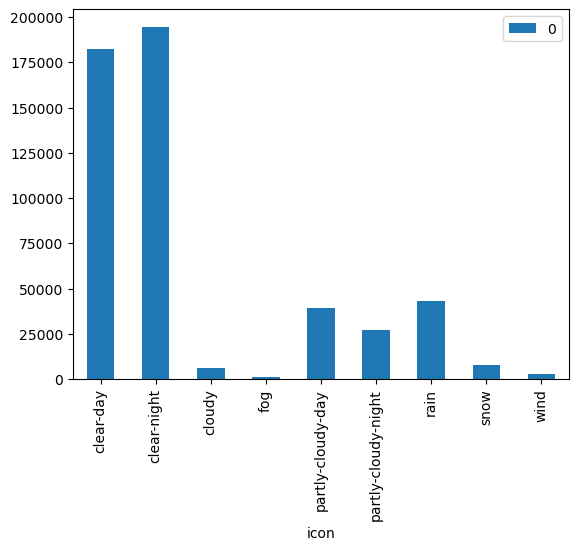

In [21]:
# Diagrama de frecuencias para la columna icon
consumo_icon = df.groupby("icon").size().reset_index()
consumo_icon.plot('icon', kind = 'bar')

<AxesSubplot:xlabel='summary'>

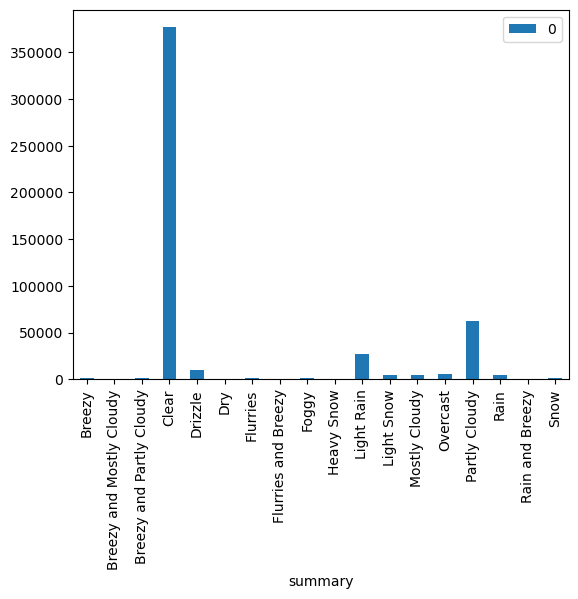

In [22]:
# Diagrama de frecuencias para la columna summary
consumo_sum = df.groupby("summary").size().reset_index()
consumo_sum.plot('summary', kind = 'bar')

Gran parte de los datos se encuentran catalogados con la condición climática "Clear-day", "Clear-night o "Clear". Al no haber una mayor distribución, se podría suponer que los datos no fueron clasificados correctamente y por tanto, estos campos no permiten crear hipótesis potenciales asociadas al consumo de energía eléctrica.

### Revision de las variables de consumo por electrodoméstico

In [23]:
# Agrupación por mes de los campos que contienen el consumo por electrodoméstico
resumen_consumo = df.groupby("month").agg({"Dishwasher [kW]":"mean", "Furnace [kW]":"mean", "Home office [kW]":"mean", "Fridge [kW]":"mean", "Wine cellar [kW]":"mean", 
                                           "Garage door [kW]":"mean", "Kitchen [kW]":"mean", "Barn [kW]":"mean", "Well [kW]":"mean", "Microwave [kW]":"mean", 
                                           "Living room [kW]":"mean"}).reset_index()

In [24]:
# Campos que contienen el consumo por electrodoméstico
campos = resumen_consumo.columns[1:]

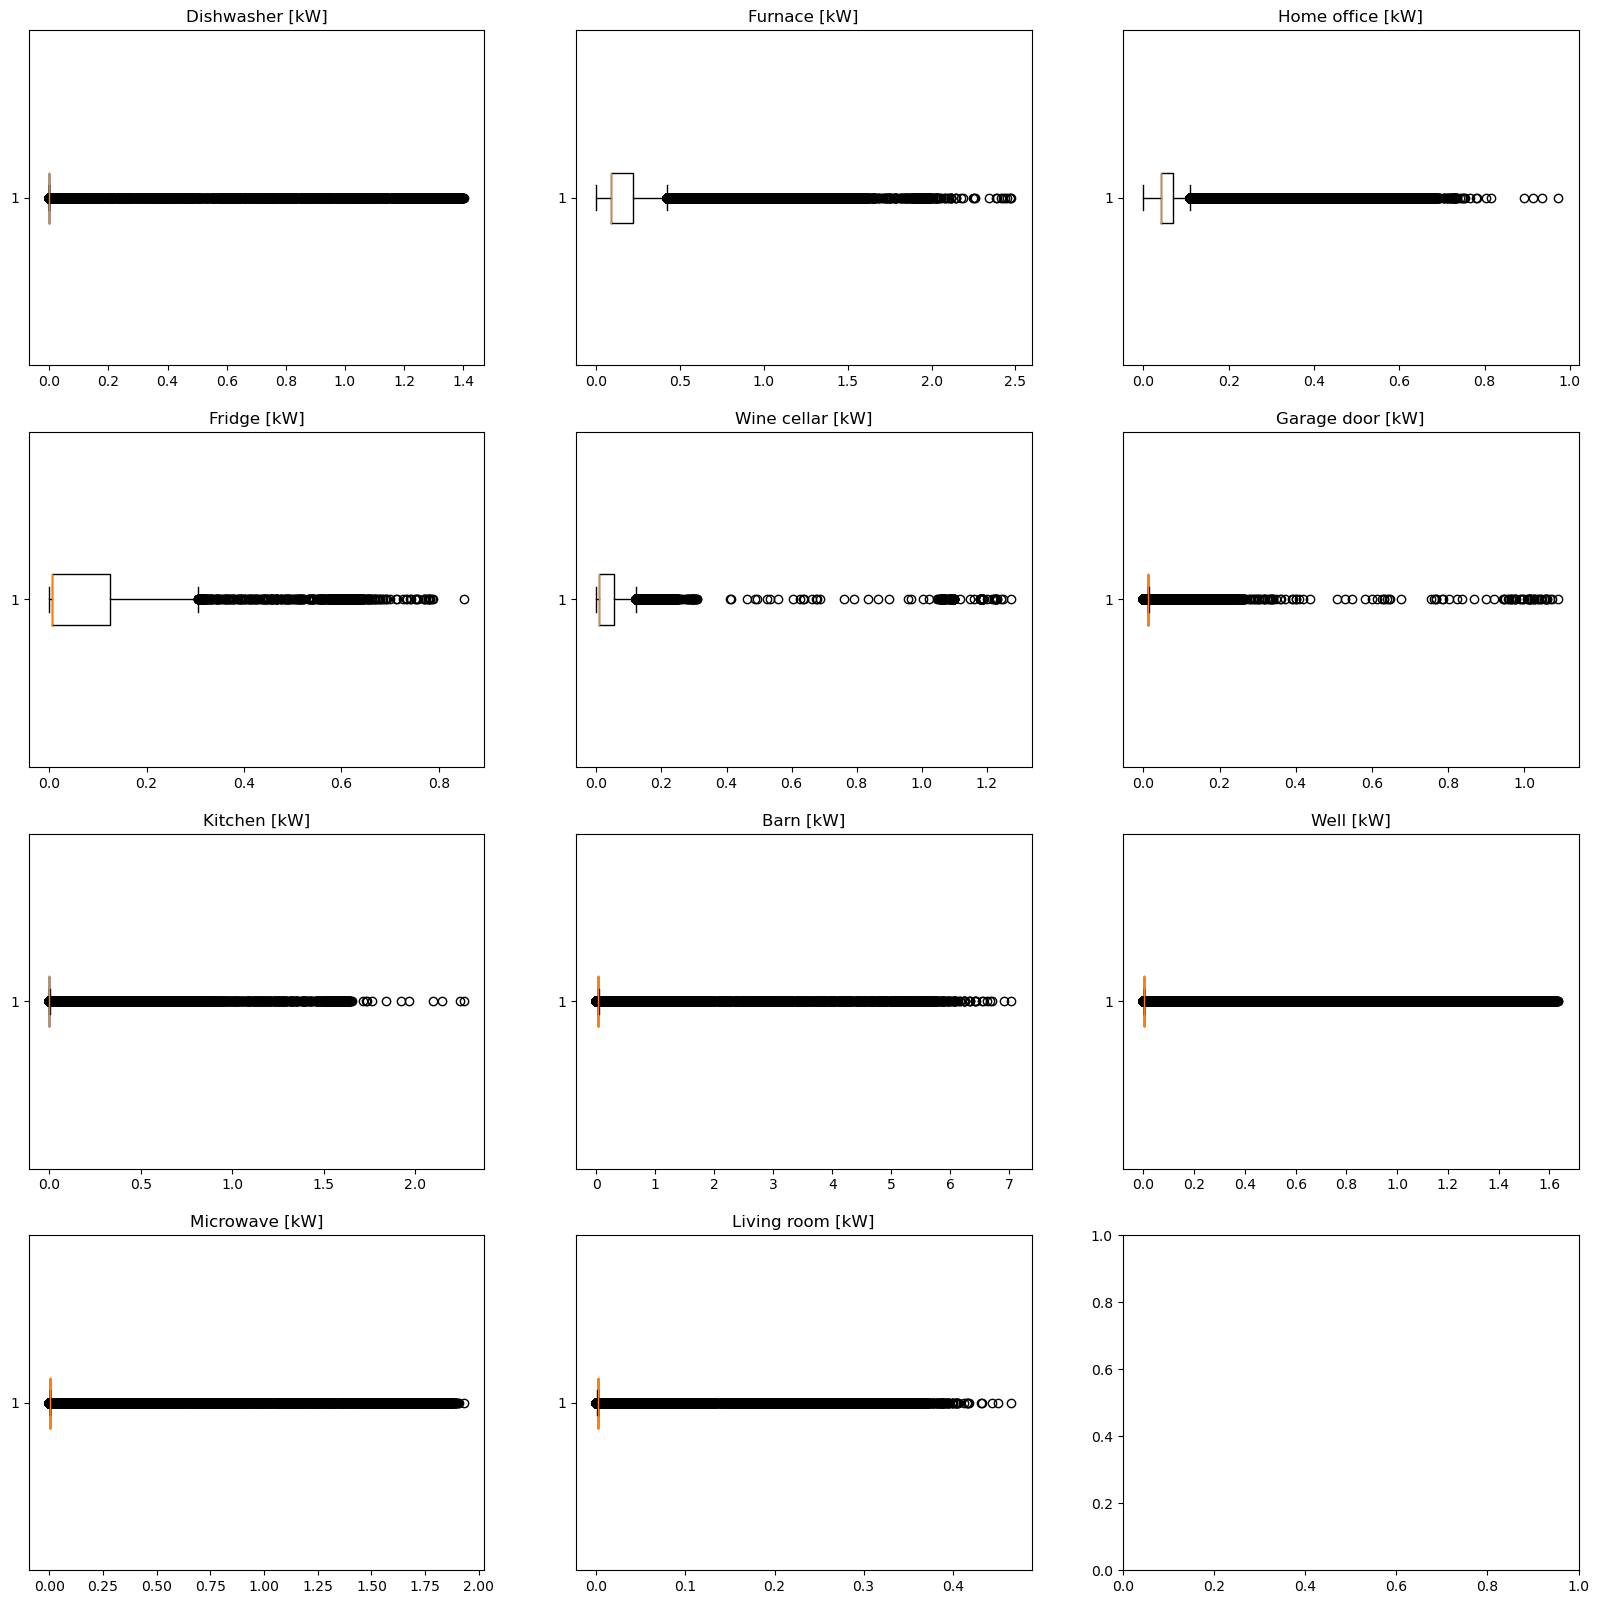

In [25]:
# Distribución del consumo por aparato eléctrico
col = 3
rows = int(np.ceil(len(campos)/col))
figure, axis = plt.subplots(rows, col, figsize=(20, 20))
j=0

for i in campos:
    x, y = int(j/col), int(j%col)
    axis[x, y].boxplot(df[i], vert=False)
    axis[x, y].set_title(i)    
    j += 1

plt.show()

Los diagramas de caja representan los datos como si existieran muchos outliers. Sin embargo, este es el comportamiento esperado considerando que el consumo suele ser esporádico. Por ejemplo, la puerta del garaje suele estar abierta o cerrada, pero en muy pocos momentos del día cambia de estado, registrando un consumo de energía. Por otro lado, el refrigerador suele permanecer conectado consumiendo constantemente electricidad; lo cual se relaciona con una caja y cuartiles más grandes.

In [26]:
meses = range(1, 12+1)

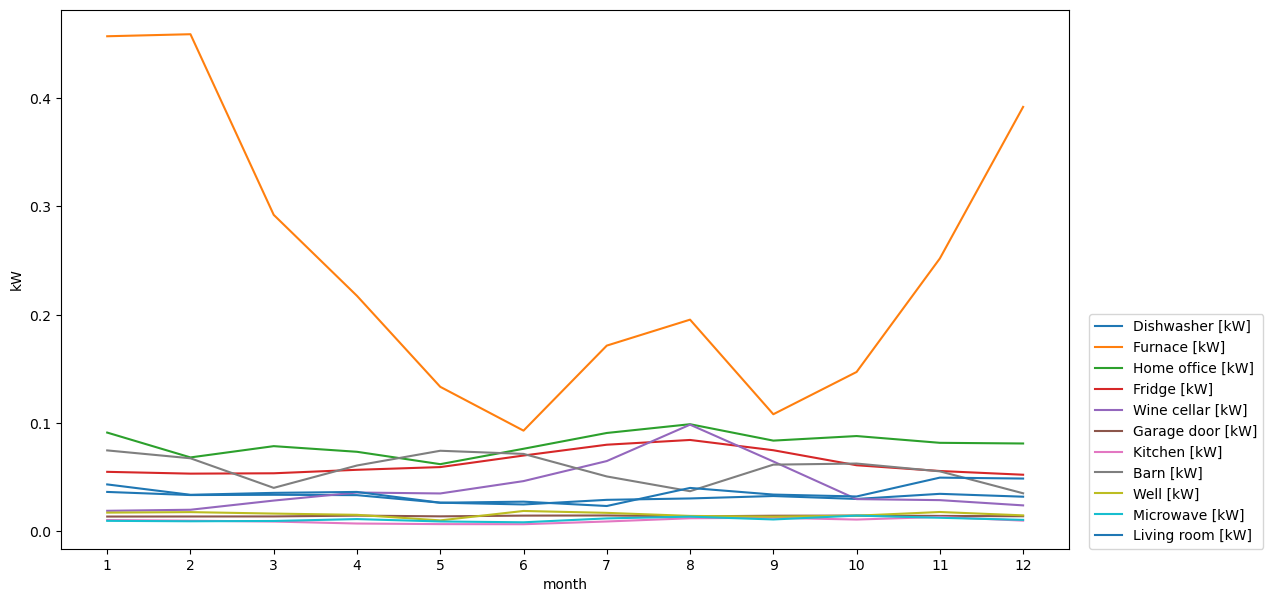

In [27]:
# Representación gráfica del consumo mensual por electrodoméstico o aparato en particular
plt.figure(figsize = (13, 7))

for i in campos:
    plt.plot(resumen_consumo['month'], resumen_consumo[i], linestyle='-', label=i)

plt.xlabel('month')
plt.ylabel('kW')
plt.xticks(meses)
plt.legend(loc=(1.02, 0))
plt.show()

La variable Furnace tiene valores más grandes en comparación con los otros campos. A primera vista, se podría asumir que impacta fuertemente el consumo total de energía. Con el fin de evaluar el comportamiento de los otros aparatos eléctricos, se omite Furnace del análisis siguiente.

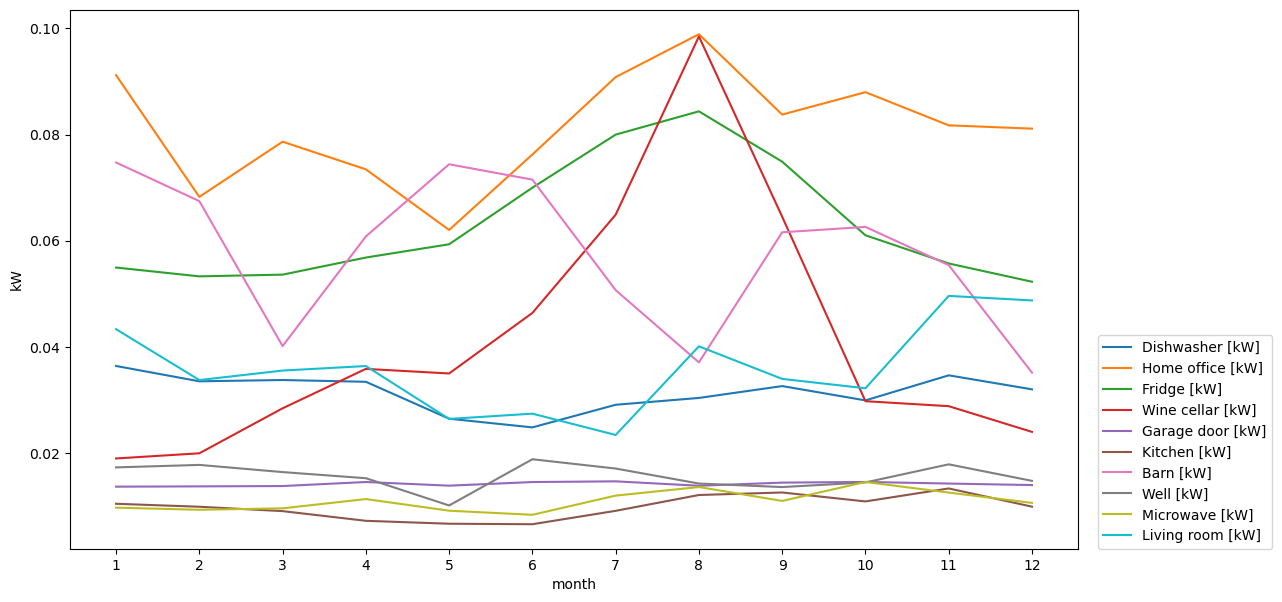

In [28]:
# Representación gráfica del consumo mensual por electrodoméstico, omitiendo Furnace
plt.figure(figsize = (13, 7))

for i in campos:
    if i != 'Furnace [kW]':
        plt.plot(resumen_consumo['month'], resumen_consumo[i], linestyle='-', label=i)

plt.xlabel('month')
plt.ylabel('kW')
plt.xticks(meses)
plt.legend(loc=(1.02, 0))
plt.show()

Como se observa en la gráfica previa, algunos electrodomésticos como refrigeradores o calefacción aumentan su consumo en los meses de mayores temperaturas (julio y agosto). Otros aparatos como la puerta del garaje, el horno microondas o aparatos de cocina tienen el mismo comportamiento durante el año y en consecuencia no afectan el consumo.

In [29]:
# Agrupación por hora de los campos que contienen el consumo por electrodoméstico
resumen_consumo = df.groupby("hour").agg({"Dishwasher [kW]":"mean", "Furnace [kW]":"mean", "Home office [kW]":"mean", "Fridge [kW]":"mean", "Wine cellar [kW]":"mean", 
                                           "Garage door [kW]":"mean", "Kitchen [kW]":"mean", "Barn [kW]":"mean", "Well [kW]":"mean", "Microwave [kW]":"mean", 
                                           "Living room [kW]":"mean"}).reset_index()

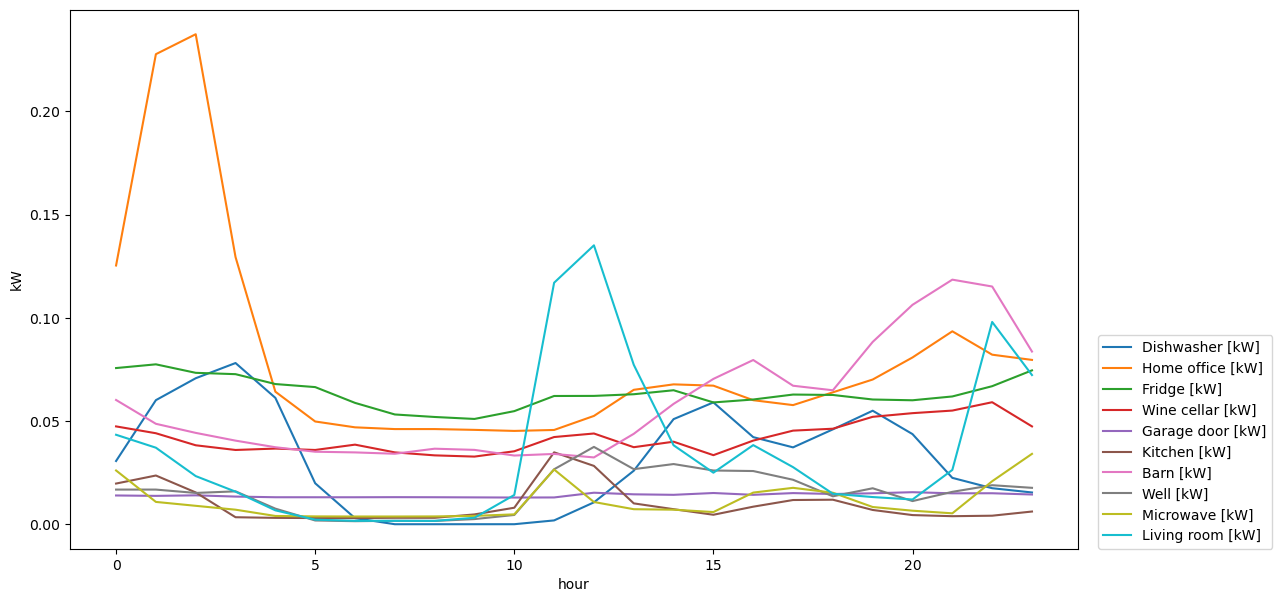

In [30]:
# Representación gráfica del consumo diario por electrodoméstico o aparato en particular
plt.figure(figsize = (13, 7))

for i in campos:
    if i != 'Furnace [kW]':
        plt.plot(resumen_consumo['hour'], resumen_consumo[i], linestyle='-', label=i)

plt.xlabel('hour')
plt.ylabel('kW')
#plt.xticks(meses)
plt.legend(loc=(1.02, 0))
plt.show()

La representación por horas del consumo muestra que existe una relación entre la hora y el consumo de energía por motivos de entretenimiento (living room), preparación de alimentos (kitchen y microwave), organización después de alimentarse (dishwasher). Sin embargo, no es claro el comportamiento del campo Home Office.

### Comparación entre el consumo de energía y la generación de energía

In [31]:
# Agrupación por mes del consumo vs generación de energía
resumen_consumo = df.groupby("month").agg({"use [kW]":sum, "gen [kW]":sum}).reset_index()

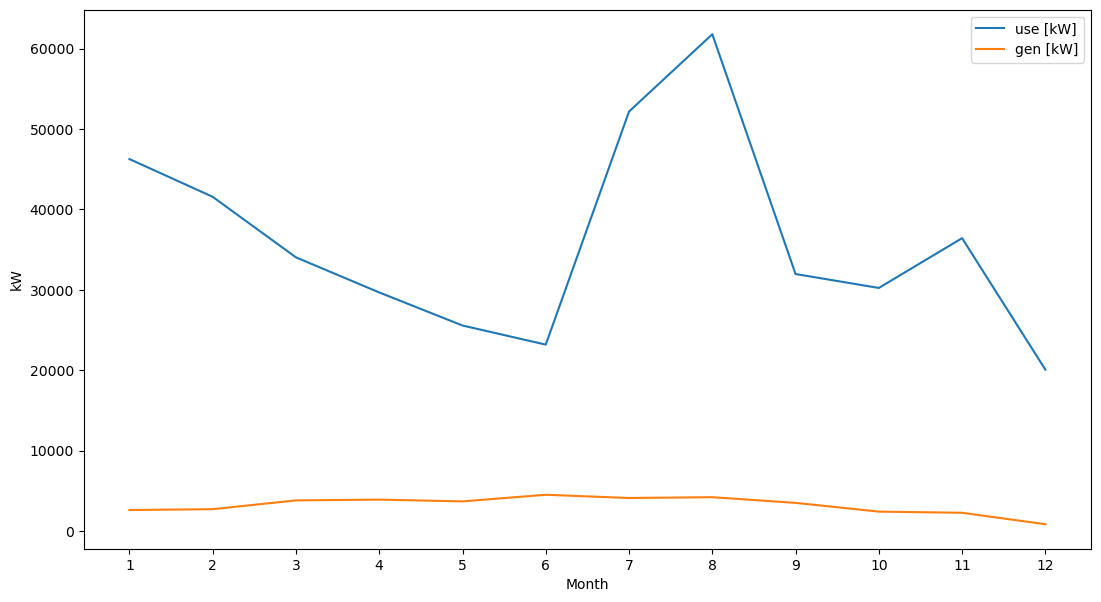

In [32]:
# Representación gráfica por mes del consumo vs generación de energía
plt.figure(figsize = (13, 7))

plt.plot(resumen_consumo['month'], resumen_consumo['use [kW]'], linestyle='-', label='use [kW]')
plt.plot(resumen_consumo['month'], resumen_consumo['gen [kW]'], linestyle='-', label='gen [kW]')

plt.xlabel('Month')
plt.ylabel('kW')
plt.xticks(meses)
plt.legend(loc = 'upper right')
plt.show()

La generación y captura de paneles solares no contrarresta o responde a la demanda de electricidad de un usuario.

### Correlación entre campos cuantitativos

In [33]:
# Matriz de correlación
df.corr()

,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],...,dewPoint,precipProbability,year,month,day,nday of week,hour,minute,Furnace [kW],Kitchen [kW]
use [kW],1.000000,-0.131635,1.000000,0.196272,0.314776,0.489414,0.147520,0.149223,0.124506,0.026531,...,0.016040,-0.003317,NaN,-0.003207,0.007126,-0.020405,0.005240,-0.000313,0.513503,0.103777
gen [kW],-0.131635,1.000000,-0.131635,0.038204,-0.020461,-0.107684,-0.085421,-0.002862,0.062430,0.036328,...,0.089664,0.041192,NaN,-0.038014,0.038253,0.004404,0.410571,0.000239,-0.082863,-0.017690
House overall [kW],1.000000,-0.131635,1.000000,0.196272,0.314776,0.489414,0.147520,0.149223,0.124506,0.026531,...,0.016040,-0.003317,NaN,-0.003207,0.007126,-0.020405,0.005240,-0.000313,0.513503,0.103777
Dishwasher [kW],0.196272,0.038204,0.196272,1.000000,0.002023,-0.008349,0.065525,0.034020,-0.004619,-0.008958,...,-0.016099,0.008189,NaN,-0.003923,-0.013282,-0.011472,-0.015590,0.001156,-0.004197,0.003272
Furnace 1 [kW],0.314776,-0.020461,0.314776,0.002023,1.000000,0.240445,-0.019692,-0.042511,-0.096036,-0.022801,...,-0.301091,0.000344,NaN,-0.203171,0.016562,-0.008269,0.044010,-0.004350,0.774086,0.014000
Furnace 2 [kW],0.489414,-0.107684,0.489414,-0.008349,0.240445,1.000000,-0.008555,-0.032574,-0.052272,0.002969,...,-0.233404,0.007913,NaN,-0.151566,-0.010192,0.004287,-0.012865,-0.002724,0.800632,0.011417
Home office [kW],0.147520,-0.085421,0.147520,0.065525,-0.019692,-0.008555,1.000000,0.035013,0.003896,-0.013537,...,0.007594,-0.032861,NaN,0.031268,-0.022400,-0.080404,-0.196688,0.000381,-0.017735,0.007517
Fridge [kW],0.149223,-0.002862,0.149223,0.034020,-0.042511,-0.032574,0.035013,1.000000,0.076183,-0.002380,...,0.115169,0.004794,NaN,0.048400,0.000145,-0.006711,-0.023261,0.002344,-0.047486,0.011322
Wine cellar [kW],0.124506,0.062430,0.124506,-0.004619,-0.096036,-0.052272,0.003896,0.076183,1.000000,0.004393,...,0.298207,0.006571,NaN,0.134409,0.027662,0.035783,0.076454,0.000860,-0.093372,0.005218
Garage door [kW],0.026531,0.036328,0.026531,-0.008958,-0.022801,0.002969,-0.013537,-0.002380,0.004393,1.000000,...,0.008350,-0.006639,NaN,0.012905,-0.000984,0.006927,0.042341,-0.004231,-0.012138,-0.000467


<AxesSubplot:>

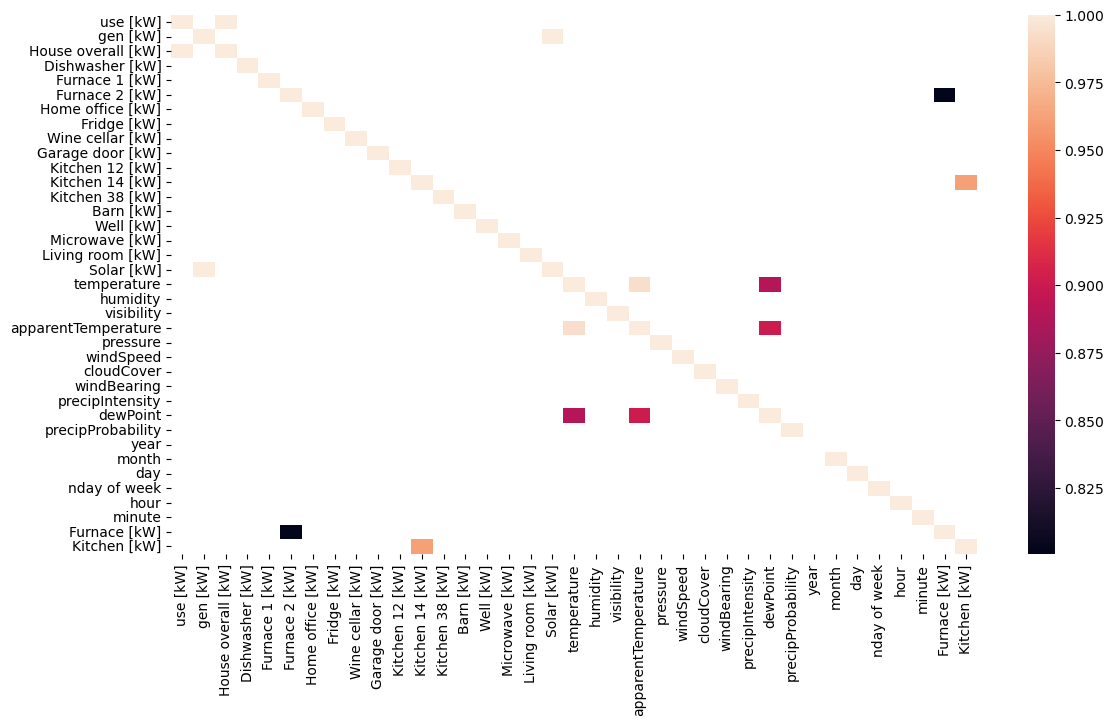

In [34]:
#Representación gráfica de la matriz de correlación filtrando por aquellas más significativas
plt.figure(figsize = (13, 7))
sns.heatmap(df.corr()[df.corr()>0.8])

Al analizar la gráfica de correlación, se decide eliminar variables que están altamente correlacionadas y por tanto no aportarían información relevante, por ejemplo: use y house overall, gen y solar, kitchen (campo totalizador) con kitchen 12-14 y 38, temperature con apparent temperature, y furnace (campo totalizador) con furnace 1 y 2.

In [35]:
df.drop(['Furnace 1 [kW]',
                'Furnace 2 [kW]',
                'Kitchen 12 [kW]',
                'Kitchen 14 [kW]',
                'Kitchen 38 [kW]',
                'apparentTemperature',
                'Solar [kW]',
                'House overall [kW]',
                'icon',
                'summary',
                'year'
                ], axis=1, inplace=True, errors= 'ignore')

C:\Users\aguer\AppData\Local\Temp\ipykernel_17056\2495869069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Furnace 1 [kW]',


In [36]:
df.head()

,time,use [kW],gen [kW],Dishwasher [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Barn [kW],Well [kW],...,dewPoint,precipProbability,month,day,day of week,nday of week,hour,minute,Furnace [kW],Kitchen [kW]
0,2016-01-01 05:00:00,0.932833,0.003483,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,...,24.4,0.0,1,1,Friday,5,5,0,0.082617,0.000567
1,2016-01-01 05:01:00,0.934333,0.003467,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,...,24.4,0.0,1,1,Friday,5,5,1,0.084533,0.000567
2,2016-01-01 05:02:00,0.931817,0.003467,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,...,24.4,0.0,1,1,Friday,5,5,2,0.083017,0.000617
3,2016-01-01 05:03:00,1.022050,0.003483,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,...,24.4,0.0,1,1,Friday,5,5,3,0.175417,0.000650
4,2016-01-01 05:04:00,1.139400,0.003467,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,0.001017,...,24.4,0.0,1,1,Friday,5,5,4,0.300917,0.000783


<AxesSubplot:>

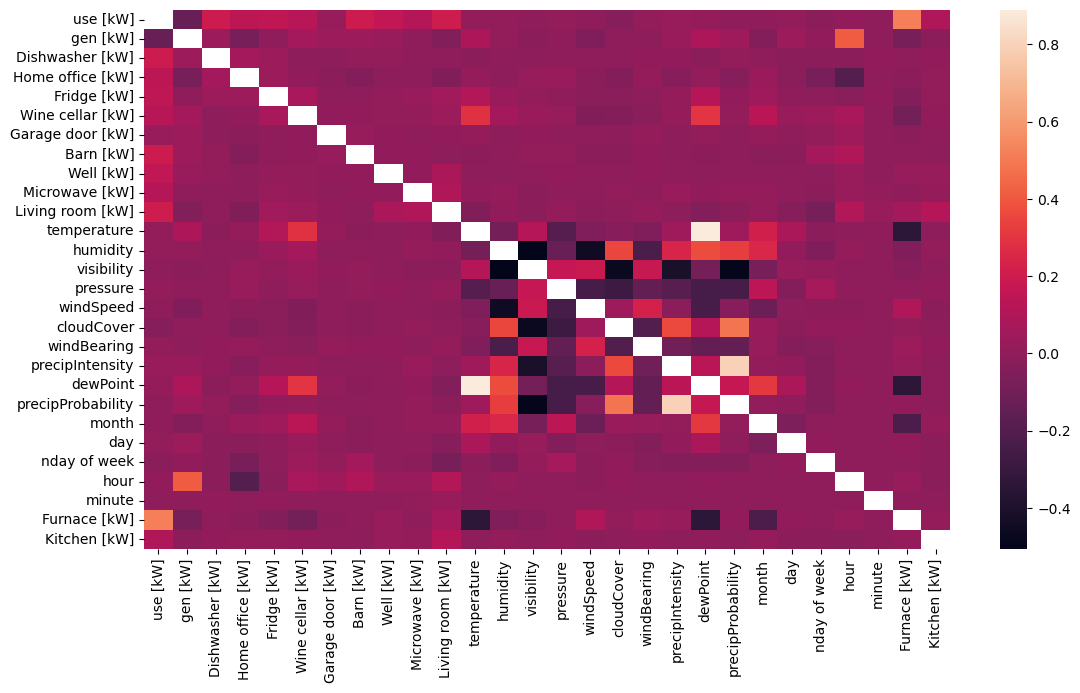

In [37]:
#Representación gráfica de la matriz de correlación filtrando por aquellas más significativas
plt.figure(figsize = (13, 7))
sns.heatmap(df.corr()[df.corr()<0.95])